In [19]:
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

In [20]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [21]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [24]:
x_train[5][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [25]:
x_train=x_train/255.0
x_test=x_test/255.0

In [26]:
x_train[5][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05098039, 0.09803922, 0.39215686, 0.47843137, 0.02745098,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)

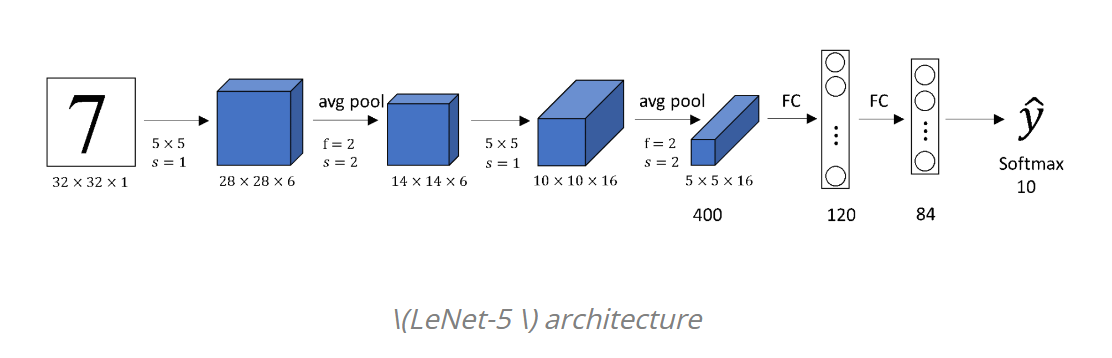

In [ ]:
model  = Sequential()

# Conv Layer 1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28,28,1)))
# Avg pooling - replace with max pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Conv Layer 2
model.add(Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
# Avg pooling - replace with max pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8290 - loss: 0.5672 - val_accuracy: 0.9724 - val_loss: 0.0861
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9733 - loss: 0.0854 - val_accuracy: 0.9848 - val_loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9832 - loss: 0.0549 - val_accuracy: 0.9847 - val_loss: 0.0461
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.9857 - loss: 0.0445 - val_accuracy: 0.9829 - val_loss: 0.0484
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9889 - loss: 0.0353 - val_accuracy: 0.9848 - val_loss: 0.0449


Text(0, 0.5, 'Accuracy')

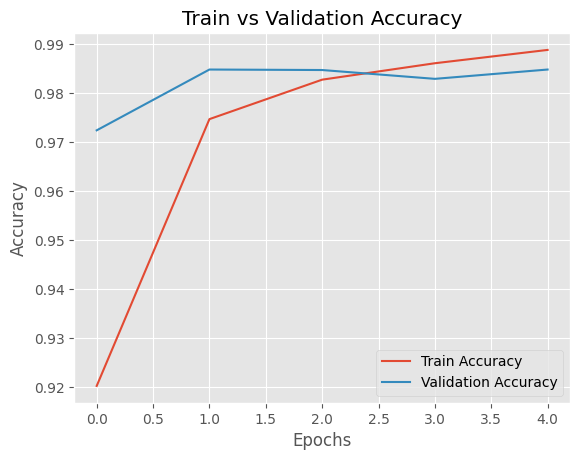

In [ ]:
plt.style.use('ggplot')
plt.plot(np.arange(0,5),history.history['accuracy'],label='Train Accuracy')
plt.plot(np.arange(0,5),history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

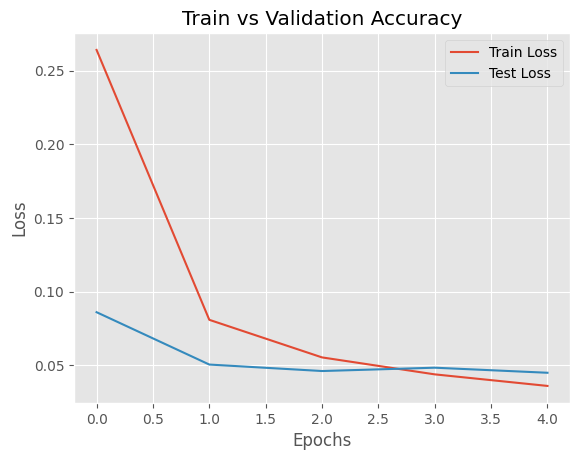

In [ ]:
plt.style.use('ggplot')
plt.plot(np.arange(0,5),history.history['loss'],label='Train Loss')
plt.plot(np.arange(0,5),history.history['val_loss'],label='Test Loss')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')